In [2]:
import datetime as dt
import requests
import pandas_datareader.data as pdr
import pandas as pd
import numpy as np
from math import floor
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<AxesSubplot:xlabel='Date'>

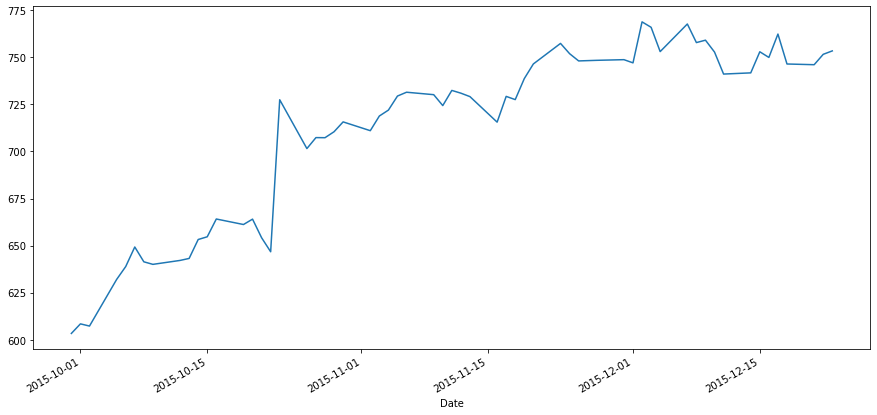

In [3]:
start=dt.datetime(2011,1,1)
end=dt.datetime(2014,12,31)
data=pdr.DataReader("GOOG","yahoo",start,end)
data['Open'].iloc[440:500].plot(figsize=(15,7))

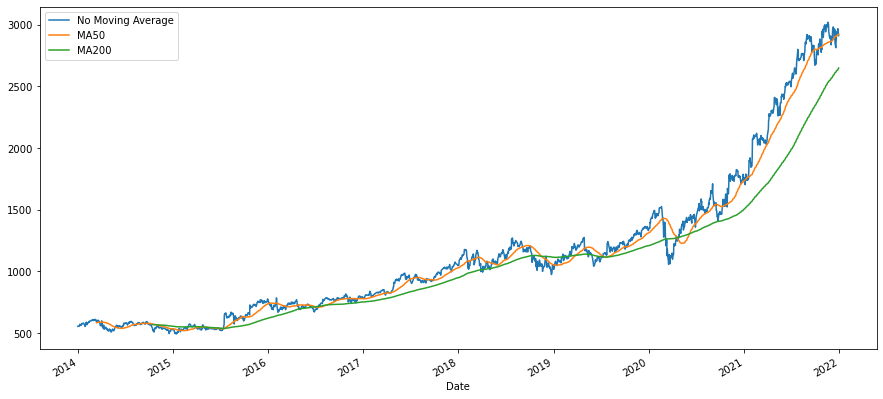

In [4]:
data['Open'].plot(label='No Moving Average',figsize=(15,7))
data['MA50']=data['Open'].rolling(50).mean()
data['MA50'].plot(label='MA50')
data['MA200']=data['Open'].rolling(200).mean()
data['MA200'].plot(label='MA200')
plt.legend()

In [5]:
def implement_macd_strategy(prices, data):    
    buy_price = []
    sell_price = []
    ma_signal = []
    signal = 0

    for i in range(len(data)):
        if data['MA50'][i] > data['MA200'][i]:
            if signal != 1:
                buy_price.append(prices[i])
                sell_price.append(np.nan)
                signal = 1
                ma_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                ma_signal.append(0)
        elif data['MA50'][i] < data['MA200'][i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(prices[i])
                signal = -1
                ma_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                ma_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            ma_signal.append(0)
            
    return buy_price, sell_price, ma_signal
            
buy_price, sell_price, ma_signal = implement_macd_strategy(data['Open'], data)

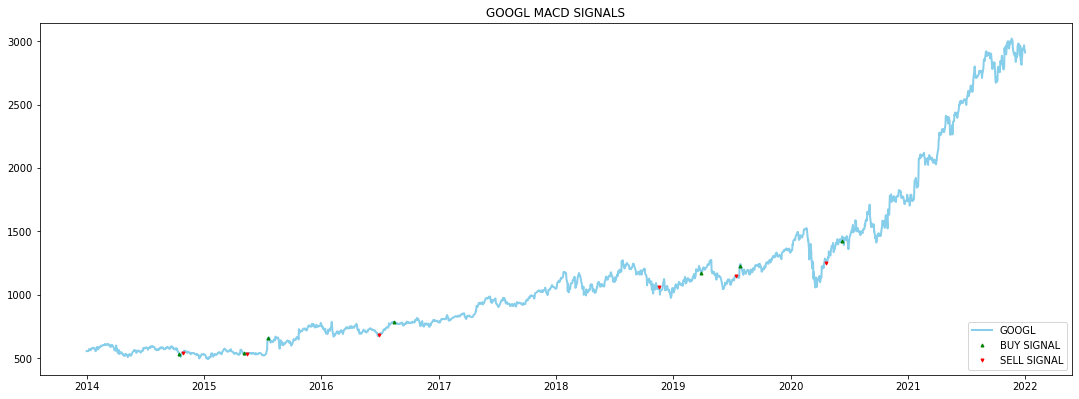

In [6]:

ax1 = plt.subplot2grid((8,1), (0,0), rowspan = 5, colspan = 1)
# ax2 = plt.subplot2grid((8,1), (5,0), rowspan = 3, colspan = 1)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)
ax1.plot(data['Open'], color = 'skyblue', linewidth = 2, label = 'GOOGL')
ax1.plot(data.index, buy_price, marker = '^', color = 'green', markersize = 3, label = 'BUY SIGNAL', linewidth = 0)
ax1.plot(data.index, sell_price, marker = 'v', color = 'r', markersize = 3, label = 'SELL SIGNAL', linewidth = 0)
ax1.legend()
ax1.set_title('GOOGL MACD SIGNALS')
# # ax2.plot(data_macd['macd'], color = 'grey', linewidth = 1.5, label = 'MACD')
# # ax2.plot(data_macd['signal'], color = 'skyblue', linewidth = 1.5, label = 'SIGNAL')

# for i in range(len(data_macd)):
#     if str(data_macd['hist'][i])[0] == '-':
#         ax2.bar(data_macd.index[i], data_macd['hist'][i], color = '#ef5350')
#     else:
#         ax2.bar(data_macd.index[i], data_macd['hist'][i], color = '#26a69a')
        
plt.legend(loc = 'lower right')
plt.show()

In [7]:
data['Open']

Date
2013-12-31     554.043335
2014-01-02     555.647278
2014-01-03     555.418152
2014-01-06     554.426880
2014-01-07     560.399475
                 ...     
2021-12-27    2949.270020
2021-12-28    2967.489990
2021-12-29    2928.590088
2021-12-30    2929.000000
2021-12-31    2910.879883
Name: Open, Length: 2016, dtype: float64

Text(0.5, 1.0, 'GOOGL MACD SIGNALS')

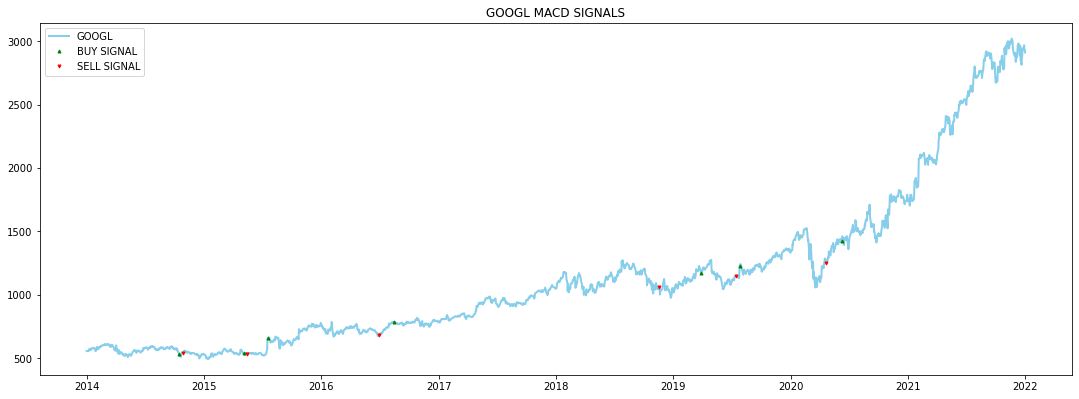

In [8]:
ax1 = plt.subplot2grid((8,1), (0,0), rowspan = 5, colspan = 1)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)
ax1.plot(data['Open'], color = 'skyblue', linewidth = 2, label = 'GOOGL')
ax1.plot(data.index, buy_price, marker = '^', color = 'green', markersize = 3, label = 'BUY SIGNAL', linewidth = 0)
ax1.plot(data.index, sell_price, marker = 'v', color = 'r', markersize = 3, label = 'SELL SIGNAL', linewidth = 0)
ax1.legend()
ax1.set_title('GOOGL MACD SIGNALS')

In [9]:
 data['hist'] = pd.DataFrame(data['MA200'] - data['MA50'])

In [10]:
data.to_csv("datama.csv")

In [11]:
# ax2 = plt.subplot2grid((8,1), (5,0), rowspan = 3, colspan = 1)
# ax2.plot(data['MA50'], color = 'grey', linewidth = 1.5, label = 'MA50')
# ax2.plot(data['MA200'], color = 'skyblue', linewidth = 1.5, label = 'MA200')
# for i in range(len(data)):
#     if str(data['hist'][i])[0] == '-':
#         ax2.bar(data.index[i], data['hist'][i], color = '#ef5350')
#     else:
#         ax2.bar(data.index[i], data['hist'][i], color = '#26a69a')
# plt.legend(loc = 'lower right')
# plt.show()

In [12]:
data['signal']=ma_signal


In [13]:
position = []
for i in range(len(ma_signal)):
    if data['signal'][i] > 1:
        position.append(0)
    else:
        position.append(1)
        
for i in range(len(data['Close'])):
    if data['signal'][i] == 1:
        position[i] = 1
    elif data['signal'][i] == -1:
        position[i] = 0
    else:
        position[i] = position[i-1]
        
MA50 = data['MA50']
MA200 = data['MA200']
O_price = data['Open']
ma_signal = pd.DataFrame(ma_signal).rename(columns = {0:'ma_signal'}).set_index(data.index)
position = pd.DataFrame(position).rename(columns = {0:'ma_position'}).set_index(data.index)

frames = [O_price, MA50, MA200, ma_signal, position]
strategy = pd.concat(frames, join = 'inner', axis = 1)

strategy

,Open,MA50,MA200,ma_signal,ma_position
Date,,,,,
2013-12-31,554.043335,NaN,NaN,0,1
2014-01-02,555.647278,NaN,NaN,0,1
2014-01-03,555.418152,NaN,NaN,0,1
2014-01-06,554.426880,NaN,NaN,0,1
2014-01-07,560.399475,NaN,NaN,0,1
...,...,...,...,...,...
2021-12-27,2949.270020,2915.015093,2631.255831,0,1
2021-12-28,2967.489990,2917.484893,2635.781780,0,1
2021-12-29,2928.590088,2919.571294,2640.029781,0,1


In [14]:
data_ret = pd.DataFrame(np.diff(data['Close'])).rename(columns = {0:'returns'})
ma_strategy_ret = []

for i in range(len(data_ret)):
    try:
        returns = data_ret['returns'][i]*strategy['ma_position'][i]
        ma_strategy_ret.append(returns)
    except:
        pass
    
ma_strategy_ret_df = pd.DataFrame(ma_strategy_ret).rename(columns = {0:'ma_returns'})

investment_value = 100000
number_of_stocks = floor(investment_value/data['Close'][0])
ma_investment_ret = []

for i in range(len(ma_strategy_ret_df['ma_returns'])):
    returns = number_of_stocks*ma_strategy_ret_df['ma_returns'][i]
    ma_investment_ret.append(returns)

ma_investment_ret_df = pd.DataFrame(ma_investment_ret).rename(columns = {0:'investment_returns'})
total_investment_ret = round(sum(ma_investment_ret_df['investment_returns']), 2)
profit_percentage = floor((total_investment_ret/investment_value)*100)
print('Profit gained from the MA strategy by investing ${} in GOOGL : ${}'.format(investment_value,total_investment_ret))
print('Profit percentage of the MA strategy : {}%'.format(profit_percentage))

Profit gained from the MA strategy by investing $100000 in GOOGL : $301596.12
Profit percentage of the MA strategy : 301%


In [15]:
def get_benchmark(start_date, investment_value):
    spy = pdr.DataReader('GOOG',"yahoo", start_date)['Close']
    benchmark = pd.DataFrame(np.diff(spy)).rename(columns = {0:'benchmark_returns'})
    
    investment_value = investment_value
    number_of_stocks = floor(investment_value/spy[0])
    benchmark_investment_ret = []
    
    for i in range(len(benchmark['benchmark_returns'])):
        returns = number_of_stocks*benchmark['benchmark_returns'][i]
        benchmark_investment_ret.append(returns)

    benchmark_investment_ret_df = pd.DataFrame(benchmark_investment_ret).rename(columns = {0:'investment_returns'})
    return benchmark_investment_ret_df

benchmark = get_benchmark('2020-01-01', 100000)

investment_value = 100000
total_benchmark_investment_ret = round(sum(benchmark['investment_returns']), 2)
benchmark_profit_percentage = floor((total_benchmark_investment_ret/investment_value)*100)
print('Benchmark profit by investing $100k : {}'.format(total_benchmark_investment_ret))
print('Benchmark Profit percentage : {}%'.format(benchmark_profit_percentage))
print('MA Strategy profit is {}% higher than the Benchmark Profit'.format(profit_percentage - benchmark_profit_percentage))

Benchmark profit by investing $100k : 67955.69
Benchmark Profit percentage : 67%
MA Strategy profit is 234% higher than the Benchmark Profit


In [150]:
data['signal']

Date
2019-12-31    0
2020-01-02    0
2020-01-03    0
2020-01-06    0
2020-01-07    0
             ..
2021-12-27    0
2021-12-28    0
2021-12-29    0
2021-12-30    0
2021-12-31    0
Name: signal, Length: 506, dtype: int64